# Import libraries

In [45]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import lightgbm as lgb

import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
import xgboost as xgb
from xgboost import plot_tree

from sklearn.linear_model import LogisticRegression


import matplotlib.style as style 

seed = 123

# Display style

In [2]:
style.use('seaborn-notebook') #sets the size of the charts
style.use("seaborn-pastel")

"""Display float values instead of scientific notations"""
pd.options.display.float_format = "{:.2f}".format      

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Read file

In [3]:
train = pd.read_csv('train.csv')

In [34]:
test = pd.read_csv('test.csv')

In [5]:
train.shape

(200000, 202)

In [35]:
test.shape

(200000, 201)

In [13]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_code,200000,200000,train_83201,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,200000.00,NaN,NaN,NaN,0.10,0.30,0.00,0.00,0.00,0.00,1.00
var_0,200000.00,NaN,NaN,NaN,10.68,3.04,0.41,8.45,10.52,12.76,20.32
var_1,200000.00,NaN,NaN,NaN,-1.63,4.05,-15.04,-4.74,-1.61,1.36,10.38
var_2,200000.00,NaN,NaN,NaN,10.72,2.64,2.12,8.72,10.58,12.52,19.35
var_3,200000.00,NaN,NaN,NaN,6.80,2.04,-0.04,5.25,6.83,8.32,13.19
var_4,200000.00,NaN,NaN,NaN,11.08,1.62,5.07,9.88,11.11,12.26,16.67
var_5,200000.00,NaN,NaN,NaN,-5.07,7.86,-32.56,-11.20,-4.83,0.92,17.25
var_6,200000.00,NaN,NaN,NaN,5.41,0.87,2.35,4.77,5.39,6.00,8.45
var_7,200000.00,NaN,NaN,NaN,16.55,3.42,5.35,13.94,16.46,19.10,27.69


In [18]:
def check_nulls(df, dfname):
    allsum = df.shape[0]
    for col in df.columns:
        nasum = df[col].isna().sum()
        if nasum > 0:
            print(dfname, col, df[col].dtype, nasum, np.round((nasum*100)/allsum),2)
        else: 
            print('No null value')

In [20]:
check_nulls(train, 'training set')

No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No null value
No nul

In [22]:
train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 202 columns):
ID_code    object
target     int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
var_29     float64
var_30     float64
var_31     float64
var_32     float64
var_33     float64
var_34     float64
var_35     float64
var_36     float64
var_37     float64
var_38     float64
var_39     float64
var_40     float64
var_41     float64
var_42     float64
var_43     float64
var_44     float6

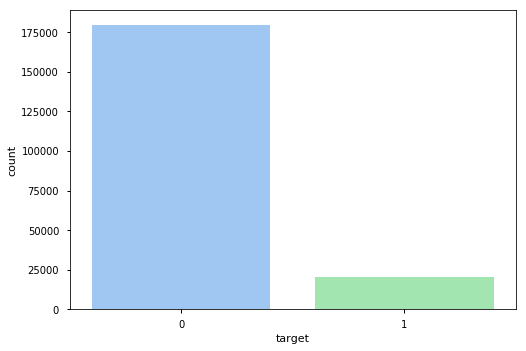

In [24]:
sns.countplot('target', data = train)

In [31]:
# Now check the number of percentage 

# Number of IDs that labelled 1 as the target
target_1 = len(train[train['target'] == 1])  

# Number of IDs that labeled 0 as the target 
target_0 = len(train[train['target'] == 0])  

# Percentage
percentage_target_1 = target_1 * 1.0 / (target_1 + target_0)
percentage_target_0 = 1 - percentage_target_1

print('Percent of IDs labeled as target 1:', percentage_target_1 * 100)
print('Percent of IDs labeled as target 0:',  percentage_target_0 * 100)

Percent of IDs labeled as target 1: 10.049
Percent of IDs labeled as target 0: 89.95100000000001


# Set up train validation split

In [59]:
# Features

# Let's remove the ID code as the feature for now
# There is a chance that the ID code is for example time dependent and have predict value, but we will deal that possiblility later
X = train.drop(['target', 'ID_code'], axis = 1)

# Labels
y = train['target']

In [60]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

In [61]:
# Check the label distribution in train and val set
print(y_train.sum()/len(y_train))
print(y_val.sum()/len(y_val))

0.1004875
0.1005


In [62]:
feature_names = list(X_train)

# Baseline model with XG boost

In [66]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

In [90]:
# Set up watchlist
watchlist = [(dval, 'evals'), (dtrain, 'train')]

In [153]:
# Set up parameters 

params = {
    'objective':'binary:logistic',
    'max_depth':5,
    'silent':0,
    'eta':.05,
    'eval_metric':'auc', 
    'scale_pos_weight':40, 
    'seed':seed,
    'early_stopping_rounds':5,
    'subsample':0.6,
    'verbose':20
}

num_rounds = 100

In [154]:
# evaluation dictionary
eval_dict = dict()

In [155]:
# Train the booster and make predictions
bst = xgb.train(params, dtrain, num_rounds, watchlist, evals_result = eval_dict, verbose_eval=True)

[16:37:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[0]	evals-auc:0.626199	train-auc:0.643564
[16:37:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[1]	evals-auc:0.636893	train-auc:0.657691
[16:37:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[2]	evals-auc:0.64697	train-auc:0.671089
[16:37:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[3]	evals-auc:0.649522	train-auc:0.677818
[16:37:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[4]	evals-auc:0.651275	train-auc:0.680874
[16:37:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	evals-auc:0.655354	train-auc:0.686477
[16:37:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra 

In [106]:
score_list = [float(s) for s in eval_dict['evals']['auc']]
train_list = [float(s) for s in eval_dict['train']['auc']]
print(max(score_list))   # There are best score (max() - for 'auc', but min() for logloss)

#and best xgboost_round:
print(bst.best_iteration)

0.807053
99


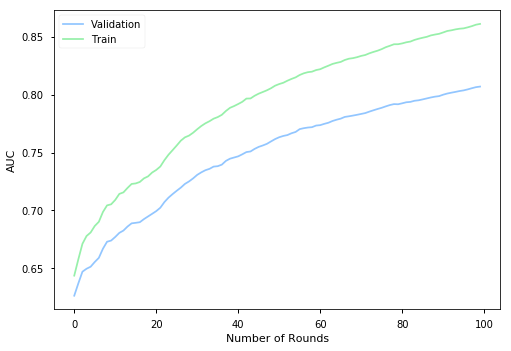

In [107]:
plt.plot(score_list)
plt.plot(train_list)
plt.legend(['Validation','Train'])
plt.xlabel('Number of Rounds');
plt.ylabel('AUC')

plt.show()

In [108]:
y_val_preds = bst.predict(dval)

In [109]:
roc_auc_score(y_val, y_val_preds)

0.80705256720842711

In [110]:
# Make predictions 
y_val_preds = bst.predict(dval)

In [111]:
# Sort the churn probability and return the index
sorted_y_val_preds_args = np.argsort(y_val_preds)

In [112]:
y_val_array = np.array(y_val)

In [113]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_preds, pos_label=1)
roc_auc = auc(fpr, tpr)

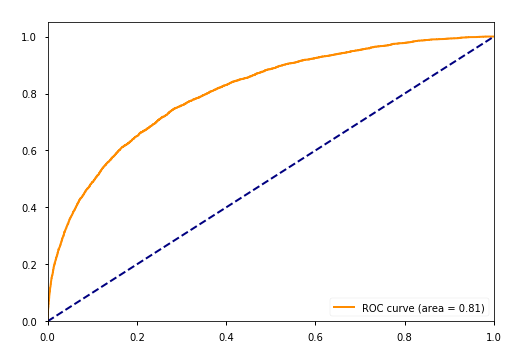

In [114]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color = 'white')
plt.ylabel('True Positive Rate',color = 'white' )
plt.title('Receiver operating characteristic',color = 'white')
plt.legend(loc="lower right")
plt.show()

In [145]:
y_val_preds_threshold = (bst.predict(dval) > 0.8).astype('int')
pd.crosstab(
    pd.Series(y_val_array, name='Actual'),
    pd.Series(y_val_preds_threshold, name='Predicted'),
    margins=True
)

Predicted,0,1,All
Actual,,,
0,29283,6697,35980
1,1478,2542,4020
All,30761,9239,40000


# Feature importance

In [115]:
xgb_importance = bst.get_score(importance_type='gain')
sorted_xgb_importance = sorted(xgb_importance.items(), key=lambda kv:kv[1], reverse = True)
sorted_xgb_importance

[('var_81', 1005.5271097381817),
 ('var_139', 747.6272870298246),
 ('var_165', 698.5387473074073),
 ('var_0', 662.8630273892306),
 ('var_110', 662.3942033749997),
 ('var_177', 640.7228176363636),
 ('var_26', 629.7098107294117),
 ('var_191', 620.981119857143),
 ('var_12', 617.1565632083334),
 ('var_22', 607.8903530324998),
 ('var_76', 595.0579395888891),
 ('var_86', 593.4404819),
 ('var_53', 592.6860293981132),
 ('var_146', 592.560601958),
 ('var_99', 586.3638915818182),
 ('var_198', 578.4514618733334),
 ('var_164', 572.60562285625),
 ('var_6', 571.4135225739999),
 ('var_44', 558.6960345516129),
 ('var_166', 555.0834699951218),
 ('var_170', 551.4627883476189),
 ('var_179', 528.4702528199999),
 ('var_91', 521.661253),
 ('var_13', 512.241560337838),
 ('var_133', 504.14480853870987),
 ('var_174', 503.28399571176465),
 ('var_94', 497.8894291238094),
 ('var_109', 496.33323311707306),
 ('var_33', 479.33477274736833),
 ('var_1', 478.558716895),
 ('var_80', 472.9039898452383),
 ('var_40', 458.0

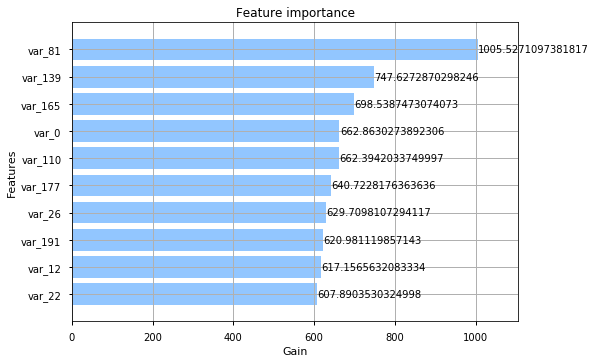

In [118]:
# Plot importance using "Gain"
xgb.plot_importance(bst, max_num_features=10, height=0.8, importance_type='gain', xlabel='Gain')

In [120]:
X_test = test.drop('ID_code', axis = 1)

In [148]:
dtest = xgb.DMatrix(X_test,feature_names=feature_names)

In [149]:
y_test_preds = bst.predict(dtest)

In [150]:
y_test_preds

array([ 0.83925778,  0.81347692,  0.81953365, ...,  0.5336079 ,
        0.84010988,  0.79393238], dtype=float32)

In [151]:
y_test_preds_thresholded = (y_test_preds> 0.8).astype('int')

In [152]:
sum(y_test_preds_thresholded)

45727

In [157]:
(y_test_preds_thresholded)

array([1, 1, 1, ..., 0, 1, 0])

In [159]:
df_sub = pd.read_csv('sample_submission.csv')

In [160]:
df_sub.target = y_test_preds_thresholded

In [162]:
df_sub.to_csv('submission_v1.csv', index = False)